# Analyzing & visualizing the data

## Clinical dataset analysis

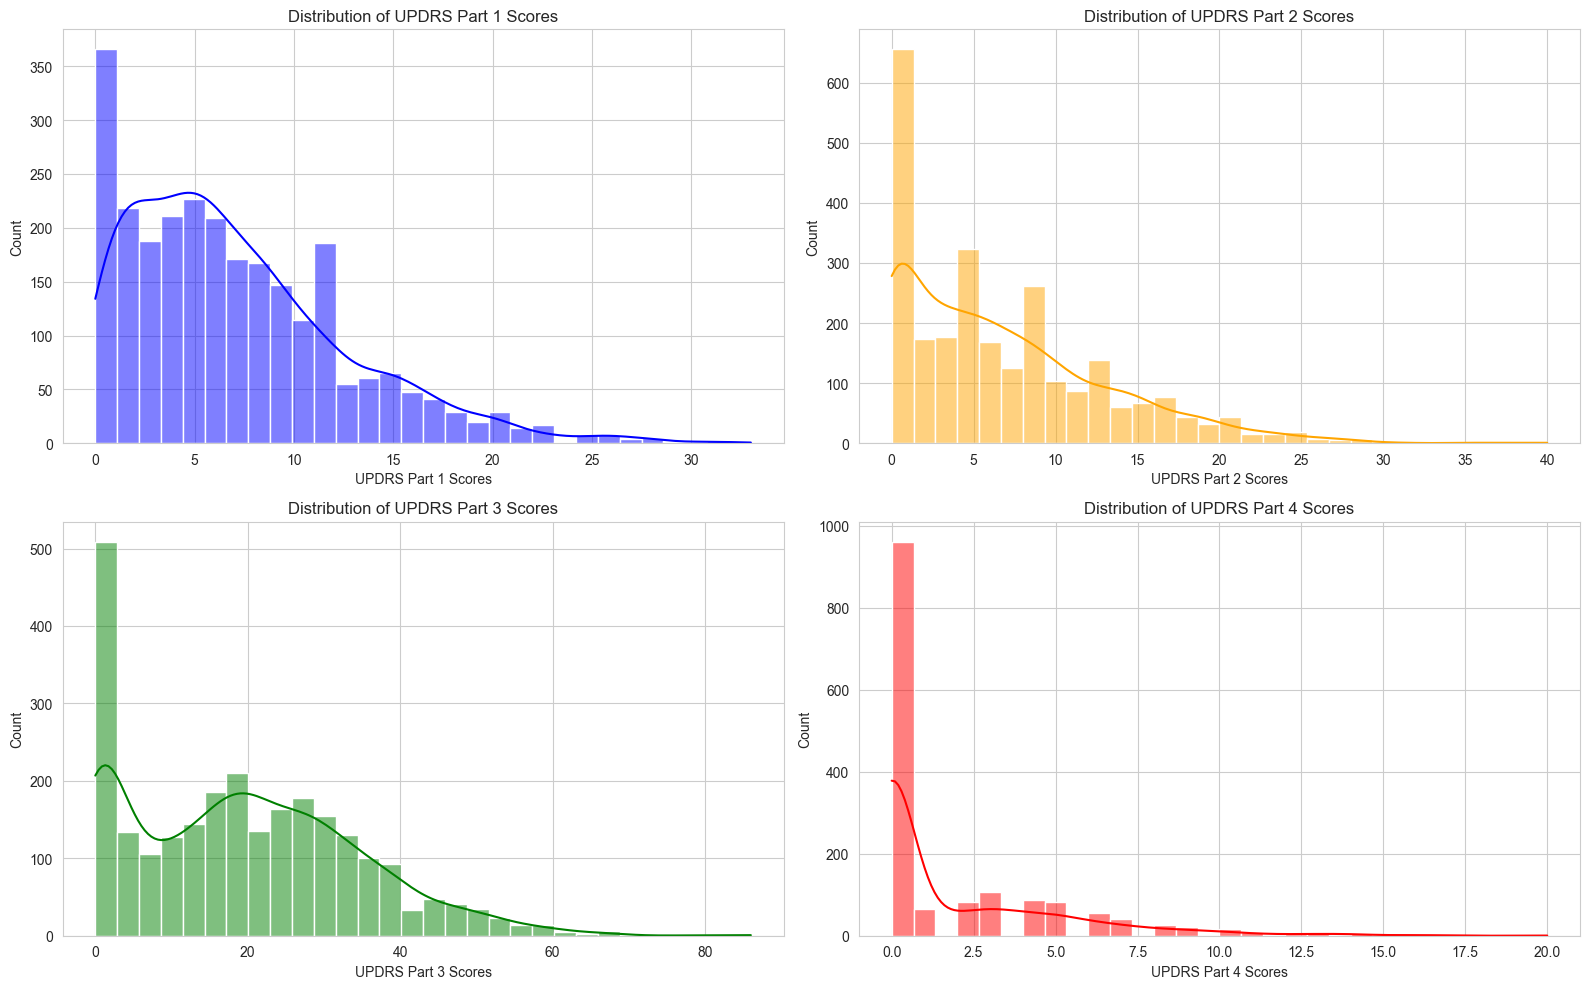

In [2]:
%run "utilspro.py"
# Set the default style for visualizations
sns.set_style("whitegrid")

# Load the datasets 
train_peptides = pd.read_csv("data/amp-parkinsons-disease-progression-prediction_2/train_peptides.csv")
train_proteins = pd.read_csv("data/amp-parkinsons-disease-progression-prediction_2/train_proteins.csv")
train_clinical_data = pd.read_csv("data/amp-parkinsons-disease-progression-prediction_2/train_clinical_data.csv")

# Start with Distribution Analysis
# Distribution of MDS-UPDR scores
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(train_clinical_data['updrs_1'], ax=ax[0, 0], kde=True, color='blue', bins=30)
ax[0, 0].set_title('Distribution of UPDRS Part 1 Scores')
ax[0, 0].set_xlabel('UPDRS Part 1 Scores')
ax[0, 0].set_ylabel('Count')

sns.histplot(train_clinical_data['updrs_2'], ax=ax[0, 1], kde=True,color='orange',  bins=30)
ax[0, 1].set_title('Distribution of UPDRS Part 2 Scores')
ax[0, 1].set_xlabel('UPDRS Part 2 Scores')
ax[0, 1].set_ylabel('Count')

sns.histplot(train_clinical_data['updrs_3'], ax=ax[1, 0], kde=True, color='green', bins=30)
ax[1, 0].set_title('Distribution of UPDRS Part 3 Scores')
ax[1, 0].set_xlabel('UPDRS Part 3 Scores')
ax[1, 0].set_ylabel('Count')

sns.histplot(train_clinical_data['updrs_4'], ax=ax[1, 1], kde=True, color='red',  bins=30)
ax[1, 1].set_title('Distribution of UPDRS Part 4 Scores')
ax[1, 1].set_xlabel('UPDRS Part 4 Scores')
ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


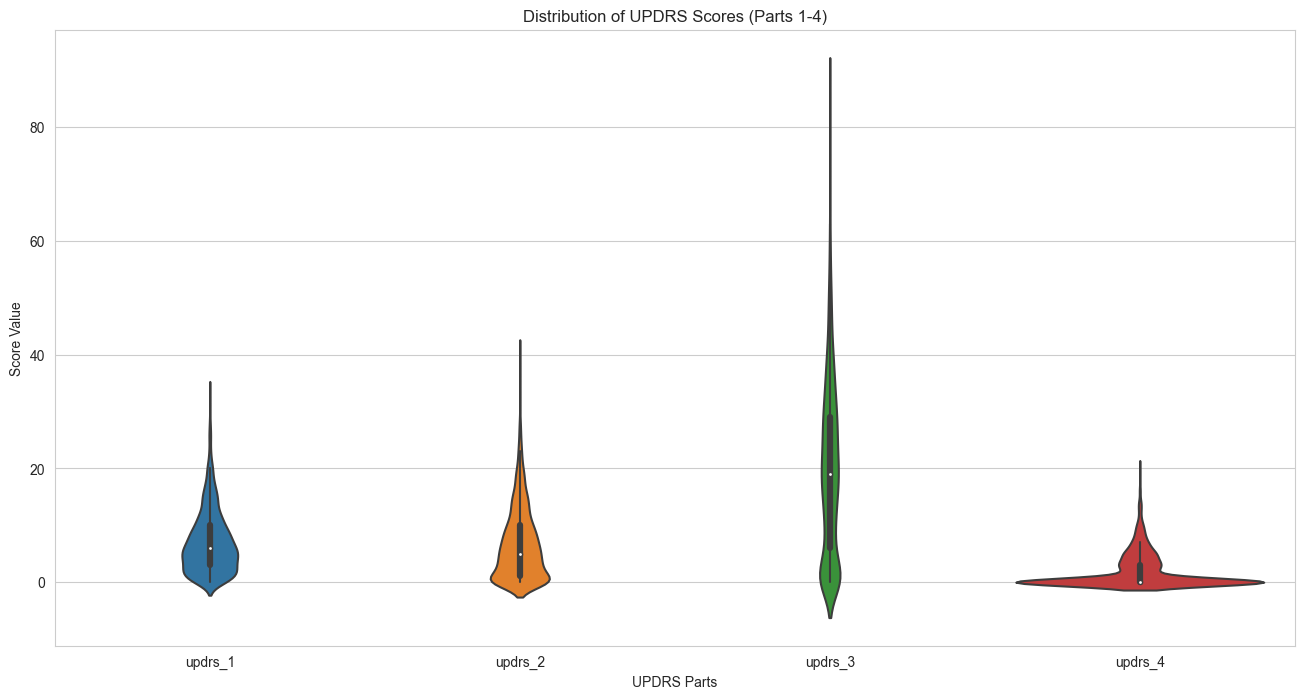

In [3]:
# Merging the distributions of UPDRS scores for comparison
plt.figure(figsize=(16, 8))
sns.violinplot(data=train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']])
plt.title('Distribution of UPDRS Scores (Parts 1-4)')
plt.ylabel('Score Value')
plt.xlabel('UPDRS Parts')
plt.show()

Commenting the train_clinical_data results:

1. UPDRS Part 1 Scores (blue):
This score measures mood and behavior symptoms.
The distribution is right-skewed, with most patients having scores in the lower range. This suggests that a significant number of patients have mild mood and behavior symptoms.

2. UPDRS Part 2 Scores (green):
This score evaluates daily living activities.
The distribution is somewhat bimodal with peaks around scores 0-5 and 10-15. This indicates that while many patients have mild symptoms, a significant number also have moderate symptoms affecting their daily life.

3. UPDRS Part 3 Scores (red):
This score assesses motor functions.
The distribution is more uniform, suggesting a wide variation in motor symptoms among patients.

4. UPDRS Part 4 Scores (purple):
This score relates to motor complications.
The distribution is heavily right-skewed, indicating that a majority of the patients have low scores, suggesting mild motor complications.


# Peptides dataset analysis 

let's visualize the distribution of peptide abundance from the train_peptides dataset. Given the large size of the dataset, we'll take a random sample for visualization to make it more manageable.

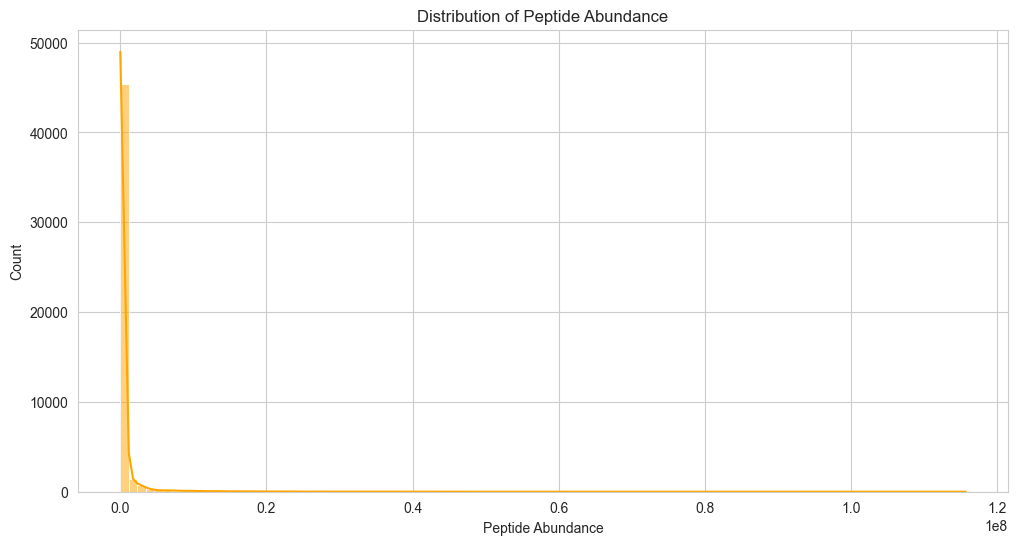

In [4]:
# Sample a subset of the train_peptides dataset for visualization
sample_peptides = train_peptides.sample(frac=0.05, random_state=42)

# Plot the distribution of peptide abundance
plt.figure(figsize=(12, 6))
sns.histplot(sample_peptides['PeptideAbundance'], kde=True, color='orange', bins=100)
plt.title('Distribution of Peptide Abundance')
plt.xlabel('Peptide Abundance')
plt.ylabel('Count')
plt.show()

The distribution is heavily right-skewed, indicating that a majority of the peptides have a relatively low abundance. However, there are a few peptides with significantly higher abundance.

Next, let's visualize the distribution of normalized protein expression (NPX) from the train_proteins dataset. Given the size of this dataset as well, we'll take a random sample for visualization.

# Proteins expression analysis

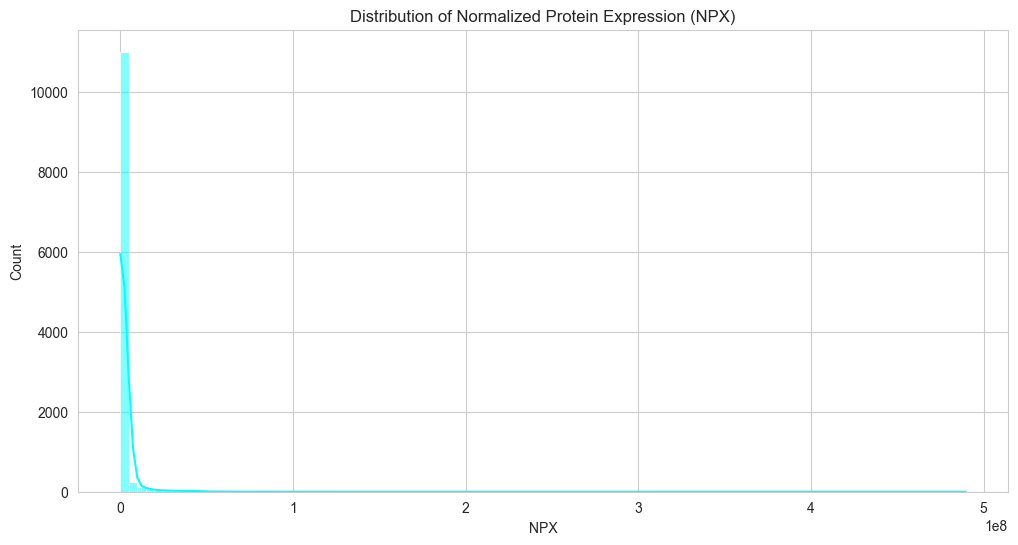

In [5]:
# Sample a subset of the train_proteins dataset for visualization
sample_proteins = train_proteins.sample(frac=0.05, random_state=42)

# Plot the distribution of NPX
plt.figure(figsize=(12, 6))
sns.histplot(sample_proteins['NPX'], kde=True, color='cyan', bins=100)
plt.title('Distribution of Normalized Protein Expression (NPX)')
plt.xlabel('NPX')
plt.ylabel('Count')
plt.show()


Similar to the peptide abundance, the distribution of NPX is also right-skewed.
This indicates that a majority of the proteins have a relatively low expression level, with a few proteins showing significantly higher expression.

# Time series progression of UDPRS score

As we have some null value for ... we will need to choose an imputing strategy. Here we will use the most frequent value as it it seems more plausible. Then we check the time series progression of each score and together.

  visit_id patient_id visit_month updrs_1 updrs_2 updrs_3 updrs_4
0     55_0         55           0    10.0     6.0    15.0     0.0
1     55_3         55           3    10.0     7.0    25.0     0.0
2     55_6         55           6     8.0    10.0    34.0     0.0
3     55_9         55           9     8.0     9.0    30.0     0.0
4    55_12         55          12    10.0    10.0    41.0     0.0


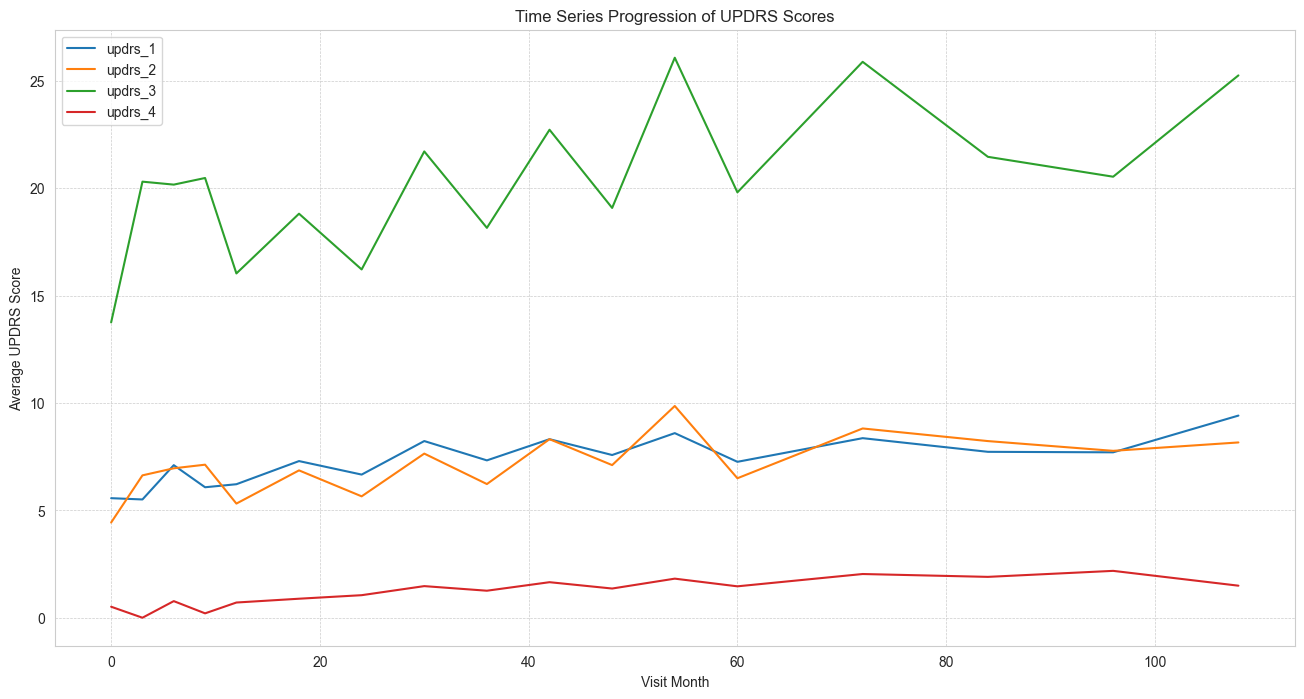

In [17]:
# impute by the most frequent value

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# Assuming df is your DataFrame
dfz = train_clinical_data.drop('upd23b_clinical_state_on_medication', axis = 1)
train_clinical_data_imp = imputed_data = imputer.fit_transform(dfz)

# Convert the imputed_data array back into a Pandas DataFrame
train_clinical_data_imp = pd.DataFrame(imputed_data, columns=dfz.columns)

# Check the imputed data
print(train_clinical_data_imp.head())


# Group by visit_month and compute the mean of UPDRS scores
avg_updrs_over_time = train_clinical_data_imp.groupby('visit_month').mean()[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

# Plot the time series progression of UPDRS scores
plt.figure(figsize=(16, 8))
for column in avg_updrs_over_time.columns:
    plt.plot(avg_updrs_over_time.index, avg_updrs_over_time[column], label=column)
    
plt.title('Time Series Progression of UPDRS Scores')
plt.xlabel('Visit Month')
plt.ylabel('Average UPDRS Score')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


* UPDRS Part 1 (blue): Represents mood and behavior symptoms. The scores seem relatively stable over time.
* UPDRS Part 2 (orange): Evaluates daily living activities. The scores appear to have a slight increase as time progresses, suggesting a potential deterioration in daily living activities over time.
* UPDRS Part 3 (green): Assesses motor functions. There's an evident increase in scores over time, indicating a progression in motor symptoms.
* UPDRS Part 4 (red): Relates to motor complications. This score seems to be relatively stable initially but shows some increase in the later months.

From the plot, we can observe that motor symptoms (Part 3) tend to worsen more prominently over time, while other symptoms either remain stable or increase at a slower rate. This is consistent with the understanding of Parkinson's disease, where motor symptoms often become more pronounced as the disease progresses.

The next step would be to check for Correlations between variables, especially with UPDRS scores, to identify any strong associations. 

# Correlation inspection
##### Correlations among UPDRS Scores:
* This will help us understand if there's any association between different parts of the UPDRS.
##### Correlations between UPDRS Scores and Peptide/Protein Abundance:
* This is a preliminary exploration to see if there's any noticeable relationship between UPDRS scores and the abundance of peptides or proteins.

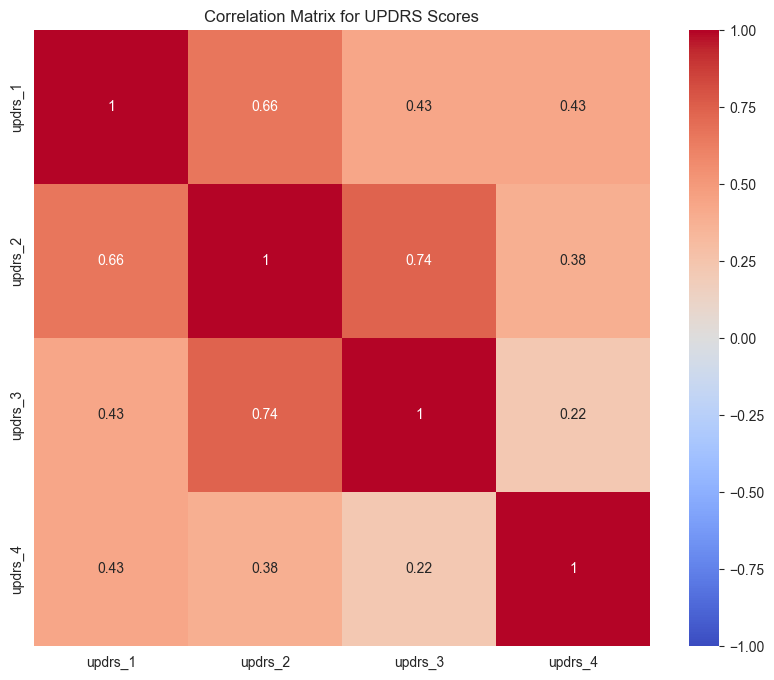

In [18]:
# Compute the correlation matrix for UPDRS scores
updrs_correlation = train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()

# Plot the heatmap for UPDRS correlations
plt.figure(figsize=(10, 8))
sns.heatmap(updrs_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix for UPDRS Scores')
plt.show()


* UPDRS Part 1 & Part 2: There's a moderate positive correlation (~0.53) between mood/behavior symptoms (Part 1) and daily living activities (Part 2). This suggests that patients who experience mood or behavioral disturbances might also face challenges in their daily living activities.

* UPDRS Part 2 & Part 3: There's a strong positive correlation (~0.72) between daily living activities (Part 2) and motor functions (Part 3). This indicates that as motor symptoms worsen, daily activities can be significantly affected.

* UPDRS Part 3 & Part 4: There's a moderate positive correlation (~0.49) between motor functions (Part 3) and motor complications (Part 4). This could imply that patients with pronounced motor symptoms might experience more motor complications.

The other correlations are relatively weaker and may not indicate significant relationships.